<a href="https://colab.research.google.com/github/ShreshthSaxena/ML/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To compare different regression models on baseline dataset

In [0]:
import os
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor


In [2]:
cd sample_data

/content/sample_data


In [3]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
train = pd.read_csv('california_housing_train.csv')
test = pd.read_csv('california_housing_test.csv')

In [0]:
train_X = train.iloc[:,:8]
train_Y = train.iloc[:,-1]
test_X = test.iloc[:,:8]
test_Y = test.iloc[:,-1]

In [0]:
# data = train.append(test)
# data.reset_index(drop = True, inplace = True)
# target = data.median_house_value

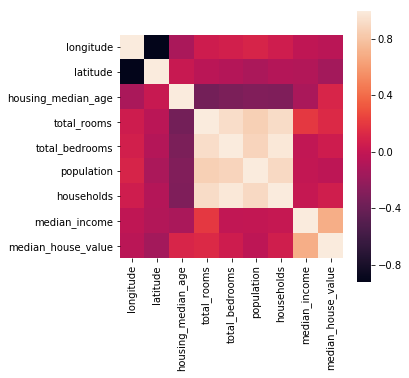

In [26]:
fig = plt.figure(figsize = (5,5))

sb.heatmap(train.corr(), square = True)
plt.show()

## Neural Net

In [60]:
NN_model = Sequential()
NN_model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal'))
# Compile model
NN_model.compile(loss='mean_absolute_error', optimizer='adam',  metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 1,043
Trainable params: 1,043
Non-trainable params: 0
_________________________________________________________________


In [0]:
# checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]

In [66]:
NN_model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split = 0.2)

Train on 13600 samples, validate on 3400 samples
Epoch 1/100
13600/13600 [==============================] - 1s 75us/step - loss: 43190.2982 - mean_absolute_error: 43190.2982 - val_loss: 56417.7494 - val_mean_absolute_error: 56417.7494
Epoch 2/100
13600/13600 [==============================] - 1s 44us/step - loss: 43230.9422 - mean_absolute_error: 43230.9422 - val_loss: 59682.6798 - val_mean_absolute_error: 59682.6798
Epoch 3/100
13600/13600 [==============================] - 1s 44us/step - loss: 43244.0508 - mean_absolute_error: 43244.0508 - val_loss: 59983.1982 - val_mean_absolute_error: 59983.1982
Epoch 4/100
13600/13600 [==============================] - 1s 43us/step - loss: 43311.2706 - mean_absolute_error: 43311.2706 - val_loss: 58416.4197 - val_mean_absolute_error: 58416.4197
Epoch 5/100
13600/13600 [==============================] - 1s 41us/step - loss: 43134.3506 - mean_absolute_error: 43134.3506 - val_loss: 57275.8650 - val_mean_absolute_error: 57275.8650
Epoch 6/100
13600/136

In [0]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [0]:
predictions = NN_model.predict(test_X)

In [69]:
mean_absolute_error(test_Y , predictions)

47199.78747526042

##Linear Regressor

In [77]:
regressor = LinearRegression()  
regressor.fit(train_X,train_Y) 

y_pred = regressor.predict(train_X)
mean_absolute_error(train_Y , y_pred)

50795.85711786407

In [78]:
predicted_prices = model.predict(test_X)
mean_absolute_error(test_Y , predicted_prices)

34311.24143333333

## Random Forest Regressor

In [79]:
model = RandomForestRegressor()
model.fit(train_X,train_Y)

predicted_prices = model.predict(train_X)
MAE = mean_absolute_error(train_Y , predicted_prices)
print('Random forest training MAE = ', MAE)

Random forest training MAE =  13395.617294117646


In [80]:
predicted_prices = model.predict(test_X)
mean_absolute_error(test_Y , predicted_prices)

34233.28833333333

## XGBoost

In [81]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_Y , verbose=False)

GBpredictions = XGBModel.predict(train_X)
MAE = mean_absolute_error(train_Y , GBpredictions)
print('XGBoost training MAE = ',MAE)

[16:02:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost training MAE =  36693.831200137865


In [82]:
GBpredictions = XGBModel.predict(test_X)
mean_absolute_error(test_Y , GBpredictions)

38396.91239973958